In [1]:
import numpy as np 
import pandas as pd 
import librosa
import librosa.display
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns
import keras.layers as L
import tensorflow as tf
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import keras.utils as utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
import regex as re
import itertools
import os

In [2]:
crema_path = './datasets/Crema/'
ravdess_path = './datasets/Ravdess/audio_speech_actors_01-24/'
savee_path = './datasets/Savee/'
tess_path = './datasets/Tess/'

In [3]:
crema = []
for file in os.listdir(crema_path):
    name = file.partition('.wav')[0].split('_')
    emotion = name[2]
    if emotion=='ANG':
        crema.append(('anger', crema_path+file))
    elif emotion=='DIS':
        crema.append(('disgust', crema_path+file))
    elif emotion=='FEA':
        crema.append(('fear', crema_path+file))
    elif emotion=='HAP':
        crema.append(('happy', crema_path+file))
    elif emotion=='NEU':
        crema.append(('neutral', crema_path+file))
    elif emotion=='SAD':
        crema.append(('sad', crema_path+file))
    else:
        crema.append(('unknown', crema_path+file))
crema_df = pd.DataFrame(crema)
crema_df.rename(columns={0:'emotion', 1:'file_path'}, inplace=True)
crema_df.head()

,emotion,file_path
0,anger,./datasets/Crema/1001_DFA_ANG_XX.wav
1,disgust,./datasets/Crema/1001_DFA_DIS_XX.wav
2,fear,./datasets/Crema/1001_DFA_FEA_XX.wav
3,happy,./datasets/Crema/1001_DFA_HAP_XX.wav
4,neutral,./datasets/Crema/1001_DFA_NEU_XX.wav


In [4]:
ravdess = []
for directory in os.listdir(ravdess_path):
    sub_dir = ravdess_path+directory
    for file in os.listdir(sub_dir):
        emotion=file.partition('.wav')[0].split('-')
        emotion_number=int(emotion[2])
        ravdess.append((emotion_number,sub_dir+'/'+file))
ravdess_df=pd.DataFrame.from_dict(ravdess)
ravdess_df.rename(columns={0:'emotion',1:'file_path'},inplace=True)
ravdess_df['emotion'].replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'anger', 6:'fear', 7:'disgust', 8:'surprised'},inplace=True)
ravdess_df.head()

,emotion,file_path
0,neutral,./datasets/Ravdess/audio_speech_actors_01-24/A...
1,neutral,./datasets/Ravdess/audio_speech_actors_01-24/A...
2,neutral,./datasets/Ravdess/audio_speech_actors_01-24/A...
3,neutral,./datasets/Ravdess/audio_speech_actors_01-24/A...
4,neutral,./datasets/Ravdess/audio_speech_actors_01-24/A...


In [5]:
savee = []
for file in os.listdir(savee_path):
    name = file.partition('.wav')[0].split('_')
    emotion = name[1][0:-2]
    if emotion=='a':
        savee.append(('anger', savee_path+file))
    elif emotion=='d':
        savee.append(('disgust', savee_path+file))
    elif emotion=='f':
        savee.append(('fear', savee_path+file))
    elif emotion=='h':
        savee.append(('happy', savee_path+file))
    elif emotion=='n':
        savee.append(('neutral', savee_path+file))
    elif emotion=='sa':
        savee.append(('sad', savee_path+file))
    elif emotion=='su':
        savee.append(('surprised', savee_path+file))
    else:
        savee.append(('unknown', savee_path+file))
savee_df = pd.DataFrame.from_dict(savee)
savee_df.rename(columns={0: 'emotion', 1: 'file_path'}, inplace=True)
savee_df.head()

,emotion,file_path
0,anger,./datasets/Savee/DC_a01.wav
1,anger,./datasets/Savee/DC_a02.wav
2,anger,./datasets/Savee/DC_a03.wav
3,anger,./datasets/Savee/DC_a04.wav
4,anger,./datasets/Savee/DC_a05.wav


In [6]:
tess = []
for dir in os.listdir(tess_path):
    dir_emo_name = dir.split('_')[1].lower()
    if dir_emo_name == 'angry':
        for file in os.listdir(tess_path+dir):
            tess.append(('anger', tess_path+dir+'/'+file))
    elif dir_emo_name == 'disgust':
        for file in os.listdir(tess_path+dir):
            tess.append(('disgust', tess_path+dir+'/'+file))
    elif dir_emo_name == 'fear':
        for file in os.listdir(tess_path+dir):
            tess.append(('fear', tess_path+dir+'/'+file))
    elif dir_emo_name == 'happy':
        for file in os.listdir(tess_path+dir):
            tess.append(('happy', tess_path+dir+'/'+file))
    elif dir_emo_name == 'neutral':
        for file in os.listdir(tess_path+dir):
            tess.append(('neutral', tess_path+dir+'/'+file))
    elif dir_emo_name=='pleasant':
        for file in os.listdir(tess_path+dir):
            tess.append(('surprised', tess_path+dir+'/'+file))
    elif dir_emo_name=='sad':
        for file in os.listdir(tess_path+dir):
            tess.append(('sad', tess_path+dir+'/'+file))
    else:
        for file in os.listdir(tess_path+dir):
            tess.append(('unknown', tess_path+dir+'/'+file))
tess_df = pd.DataFrame.from_dict(tess)
tess_df.rename(columns={0: 'emotion', 1: 'file_path'}, inplace=True) 
tess_df.head()

,emotion,file_path
0,anger,./datasets/Tess/OAF_angry/OAF_back_angry.wav
1,anger,./datasets/Tess/OAF_angry/OAF_bar_angry.wav
2,anger,./datasets/Tess/OAF_angry/OAF_base_angry.wav
3,anger,./datasets/Tess/OAF_angry/OAF_bath_angry.wav
4,anger,./datasets/Tess/OAF_angry/OAF_bean_angry.wav


In [7]:
df = pd.concat([crema_df, ravdess_df, savee_df, tess_df], axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12162 entries, 0 to 2799
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   emotion    12162 non-null  object
 1   file_path  12162 non-null  object
dtypes: object(2)
memory usage: 285.0+ KB


## Data Analysis

C:\Users\Şeyma\AppData\Local\Temp\ipykernel_14132\411452617.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  emotions=sns.countplot(x='emotion',data=df,palette='Set2')
C:\Users\Şeyma\AppData\Local\Temp\ipykernel_14132\411452617.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  emotions.set_xticklabels(emotions.get_xticklabels(),rotation=45)


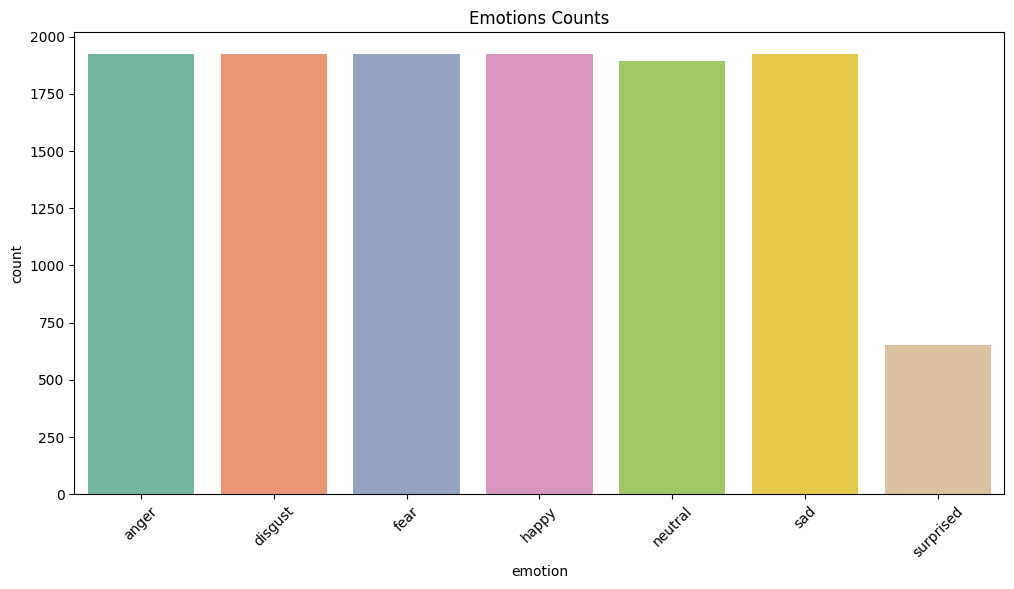

In [8]:
plt.figure(figsize=(12,6))
plt.title('Emotions Counts')
emotions=sns.countplot(x='emotion',data=df,palette='Set2')
emotions.set_xticklabels(emotions.get_xticklabels(),rotation=45)
plt.show()

In [9]:
emotion_names = df['emotion'].unique()
emotion_names

array(['anger', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprised'],
      dtype=object)

In [10]:
colors = {'disgust':'#804E2D','happy':'#F19C0E','sad':'#478FB8','neutral':'#4CB847','fear':'#7D55AA','anger':'#C00808','surprised':'#EE00FF'}

In [11]:
def wave_plot(data,sr,emotion, color):
    plt.figure(figsize=(12,5))
    plt.title(f'{emotion} emotion for waveplot',size=17)
    librosa.display.waveshow(y=data,sr=sr, color=color)
def spectogram(data,sr,emotion):
    audio=librosa.stft(data)
    audio_db=librosa.amplitude_to_db(abs(audio))
    plt.figure(figsize=(12,5))
    plt.title(f'{emotion} emotion for spectogram',size=17)
    librosa.display.specshow(audio_db,sr=sr,x_axis='time',y_axis='hz')

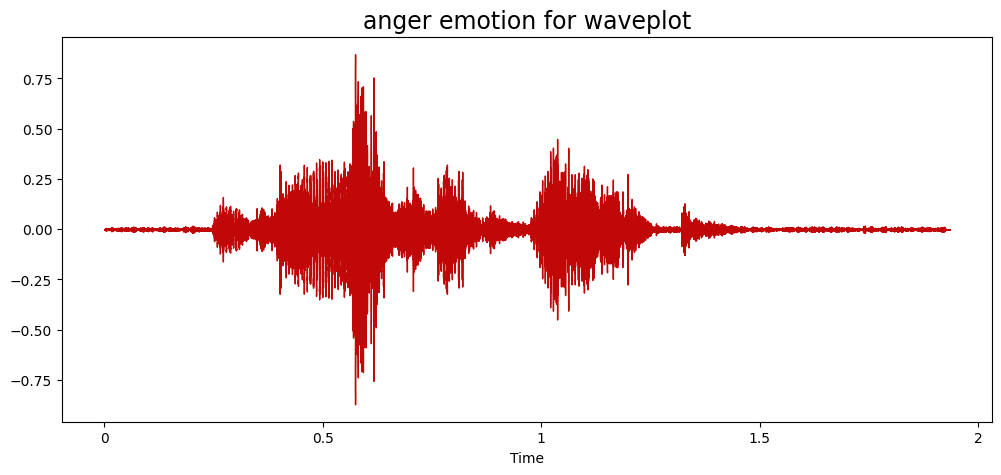

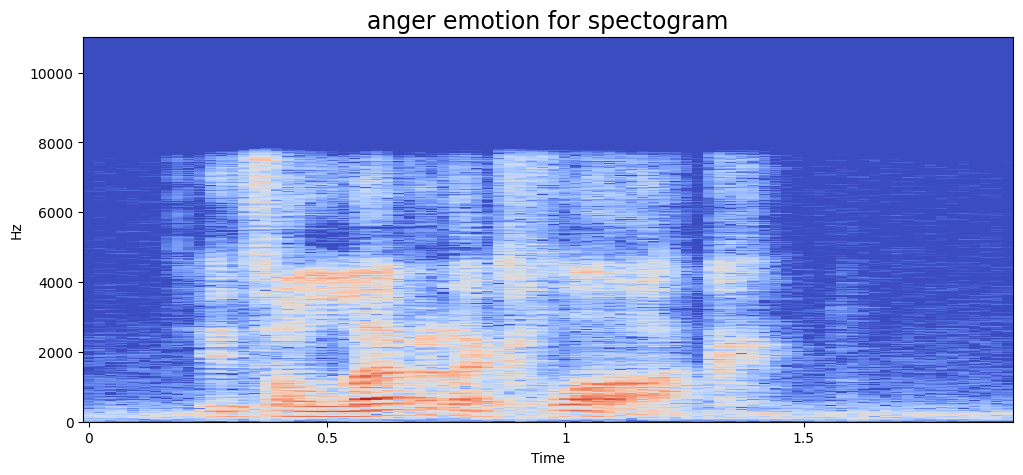

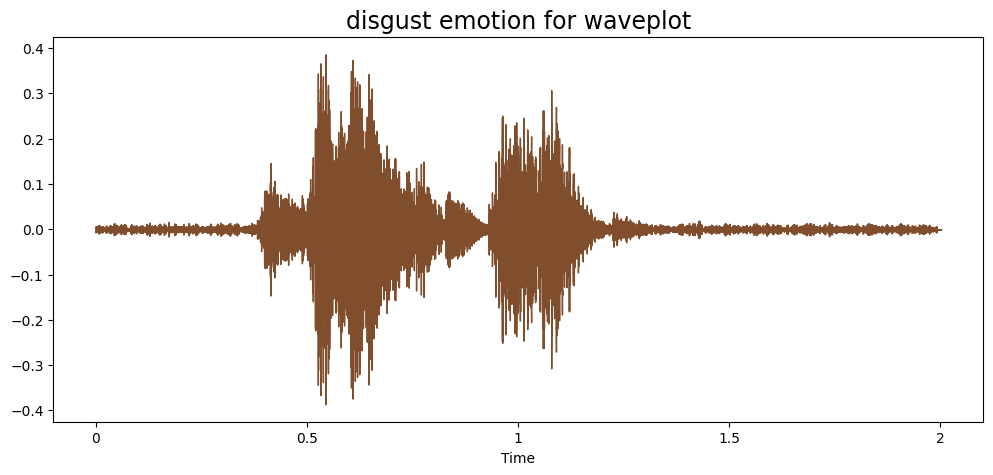

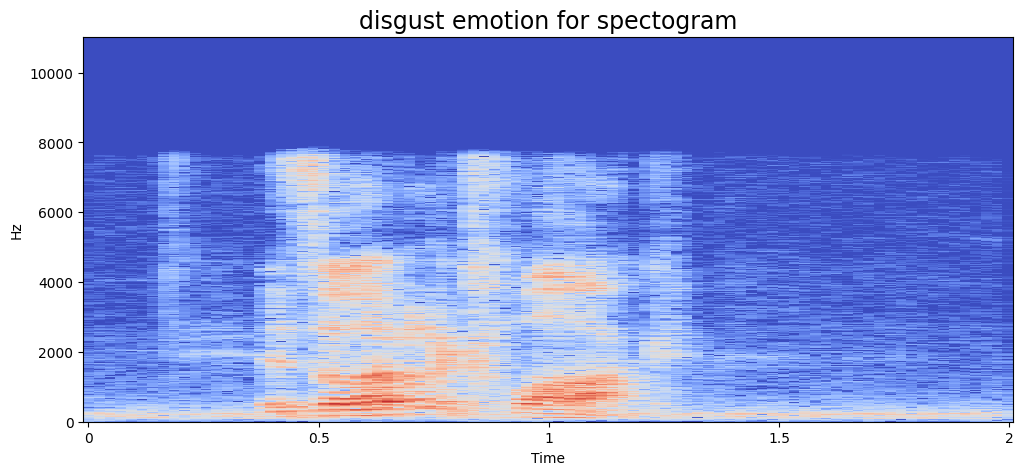

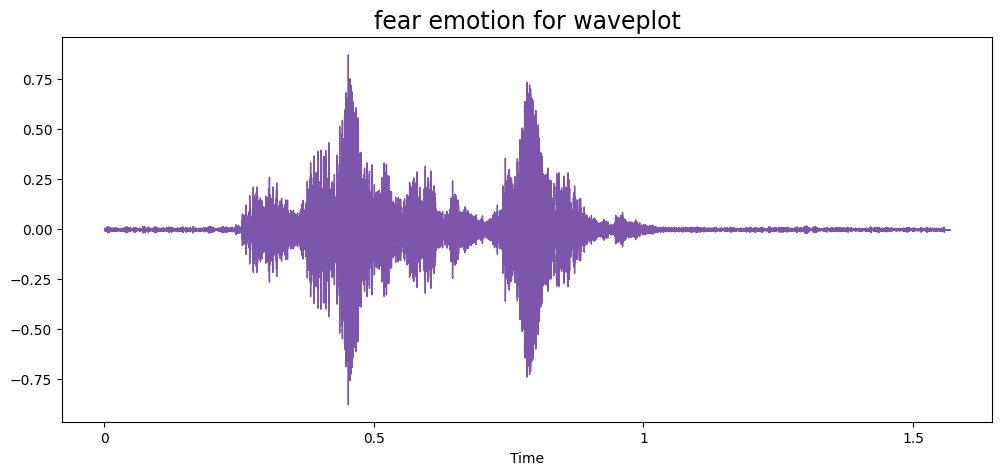

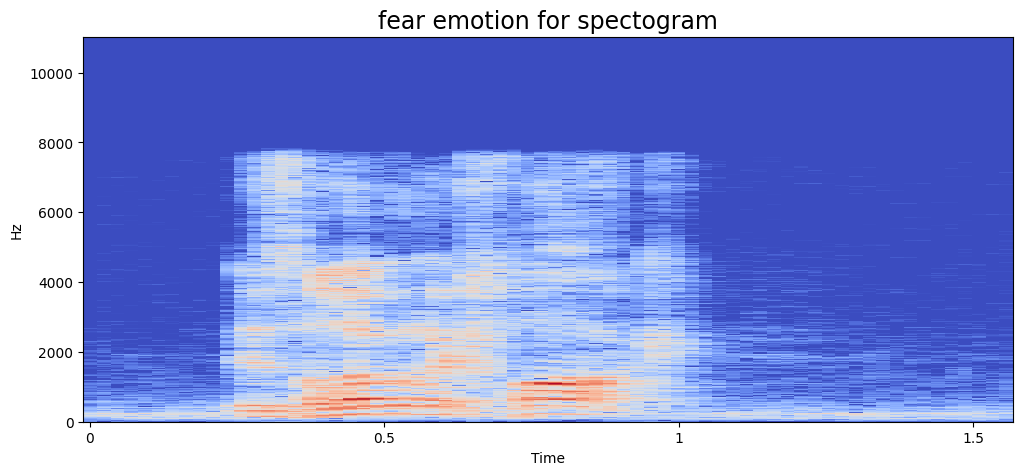

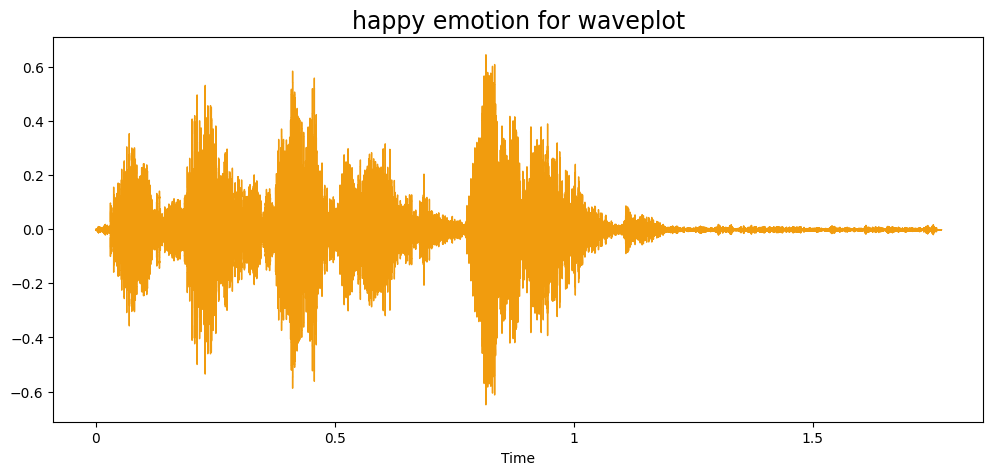

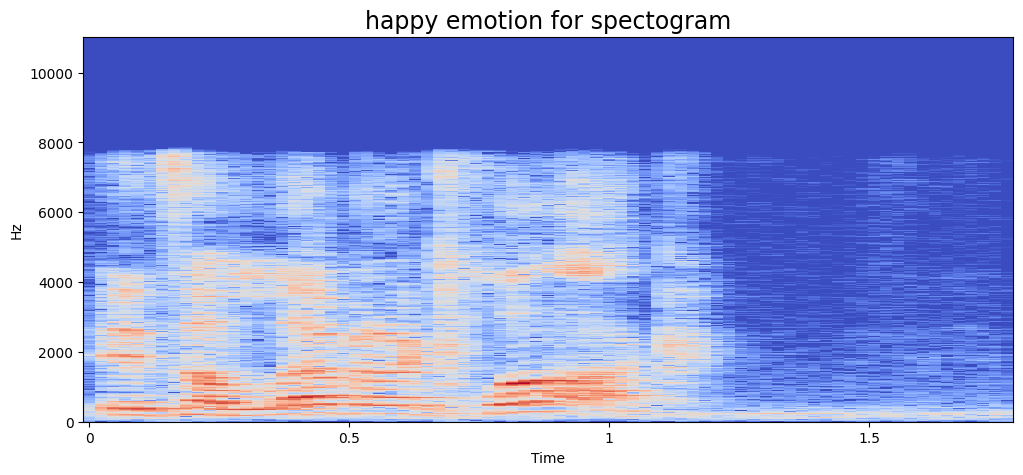

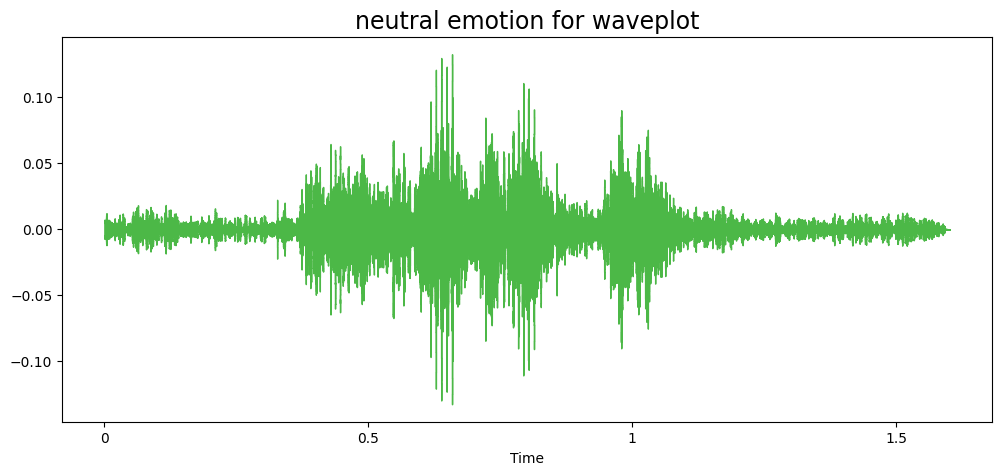

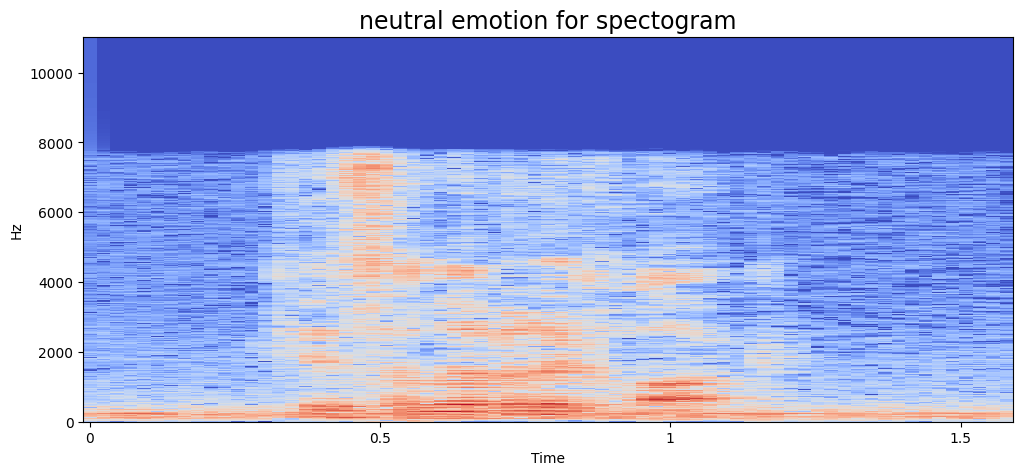

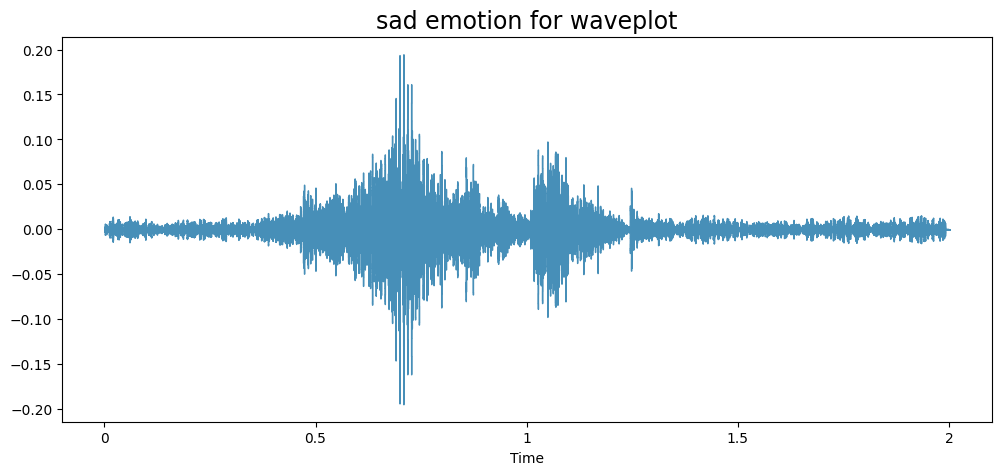

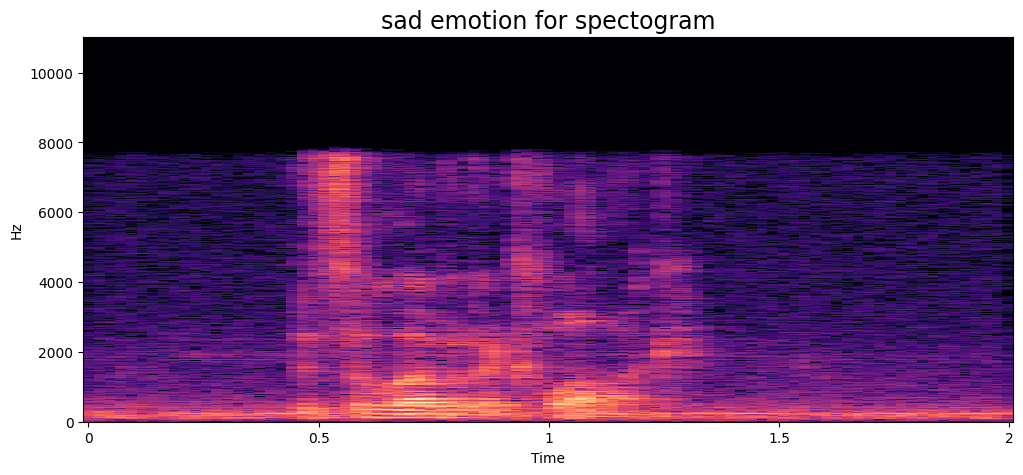

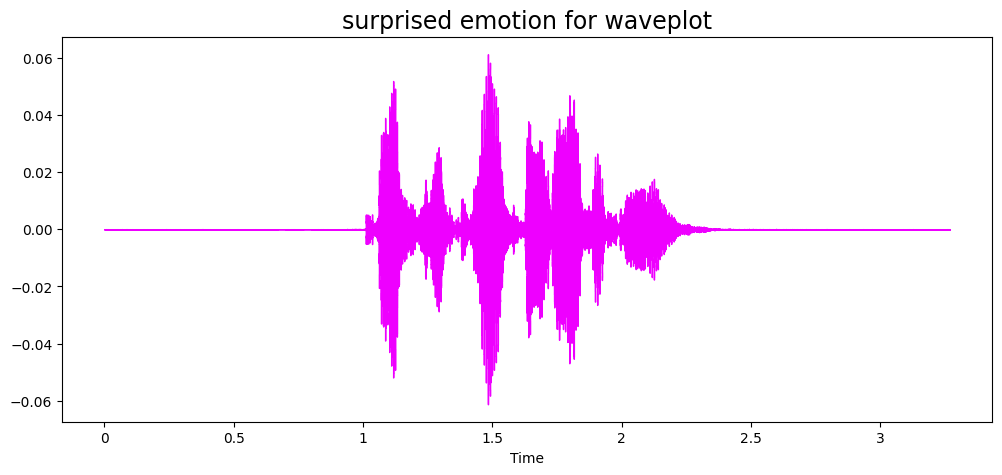

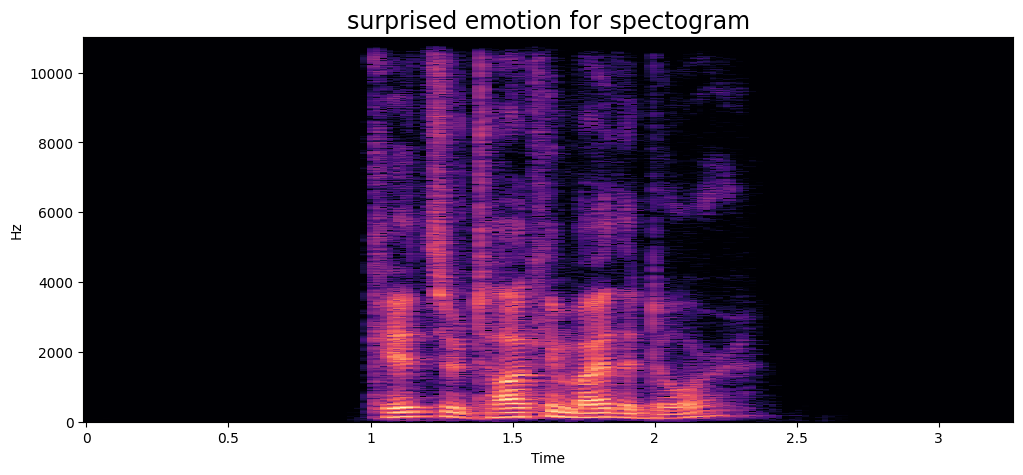

In [12]:
audio_path=[]
for emotion in emotion_names:
    path=np.array(df['file_path'][df['emotion']==emotion])[1]
    data,sr=librosa.load(path)
    wave_plot(data,sr,emotion, colors[emotion])
    spectogram(data,sr,emotion)
    audio_path.append(path)

## Feature Extraction

In [13]:
def feature_extraction(path):
    x, sr = librosa.load(path, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [14]:
X_mfcc = df['file_path'].apply(lambda x: feature_extraction(x))
X_mfcc

0       [-324.20966, 128.3947, -19.360773, 45.35388, -...
1       [-364.7359, 135.75037, -26.445019, 55.168713, ...
2       [-314.81885, 115.73832, -14.470542, 34.524033,...
3       [-335.19382, 123.35851, -19.410343, 43.848305,...
4       [-364.19574, 126.68473, -6.7764535, 40.001396,...
                              ...                        
2795    [-406.48056, 80.379875, 32.462395, 46.579094, ...
2796    [-426.90918, 102.54756, 24.800041, 43.048096, ...
2797    [-378.50494, 80.91062, 35.300533, 39.74792, -4...
2798    [-434.8618, 89.906364, 28.373262, 39.57707, -2...
2799    [-421.8341, 70.69788, 32.476387, 45.642555, 4....
Name: file_path, Length: 12162, dtype: object

In [15]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(12162, 40)

In [16]:
X = pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-324.209656,128.394699,-19.360773,45.353882,-7.781060,16.801313,-25.136723,-2.042650,-12.736442,-0.602623,...,-1.864212,-2.119521,-0.189407,-4.199692,-3.302313,-7.454986,-2.417529,-5.826252,-1.815566,-3.811475
1,-364.735901,135.750366,-26.445019,55.168713,-2.687987,21.919765,-28.330078,7.602625,-13.806363,-1.667593,...,-0.505028,-1.762987,0.357880,-3.798437,-1.243923,-8.823619,-0.548159,-4.045413,-0.130195,-2.841856
2,-314.818848,115.738319,-14.470542,34.524033,1.505026,10.507656,-21.795244,-0.572561,-8.988124,-3.483182,...,1.774395,-1.028896,1.937598,2.131980,2.894839,-1.333269,0.470993,-3.680070,0.740611,-2.688068
3,-335.193817,123.358513,-19.410343,43.848305,1.914770,13.157508,-28.989254,2.110606,-9.230224,-5.307940,...,-2.419987,-3.112249,1.997397,-0.970737,1.078152,-2.466794,1.015393,-2.262046,2.698952,0.146290
4,-364.195740,126.684731,-6.776453,40.001396,8.850146,11.770789,-15.391419,-3.485236,-10.025274,-4.084843,...,-0.097759,-4.307853,-1.320589,-0.568237,-1.298094,-4.302267,-0.654819,-3.719076,0.083910,-1.091069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12157,-406.480560,80.379875,32.462395,46.579094,-1.683400,13.425336,3.121954,-12.444939,1.779502,-3.669046,...,0.664780,9.923698,6.552720,11.472417,3.039587,4.530210,1.182843,5.800232,5.091353,6.772975
12158,-426.909180,102.547562,24.800041,43.048096,4.635151,1.589418,-3.913076,-16.237940,3.517753,-13.348096,...,-6.544246,3.926088,0.441221,7.130211,9.293228,11.191388,11.764185,11.832009,8.662523,8.261908
12159,-378.504944,80.910622,35.300533,39.747921,-4.786337,7.230661,2.237550,-10.493017,3.315185,-7.648578,...,2.555938,11.403853,7.274486,8.324022,0.578673,2.331597,-2.193613,6.463879,4.545148,7.043935
12160,-434.861786,89.906364,28.373262,39.577068,-2.448975,17.433895,-0.950397,-15.767815,-0.184667,-4.836698,...,3.281015,11.347349,6.455437,12.226357,4.241482,4.372067,5.561799,10.526768,11.808918,10.119672


In [17]:
y = df['emotion']
y

0         anger
1       disgust
2          fear
3         happy
4       neutral
         ...   
2795        sad
2796        sad
2797        sad
2798        sad
2799        sad
Name: emotion, Length: 12162, dtype: object

In [18]:
lb=LabelEncoder()
y=utils.to_categorical(lb.fit_transform(y))
print(lb.classes_)
y

['anger' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprised']


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2,shuffle=True)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((9729, 40), (2433, 40), (9729, 7), (2433, 7))

In [20]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [21]:
X_train=np.expand_dims(X_train,axis=2)
X_test=np.expand_dims(X_test,axis=2)
X_train.shape, X_test.shape

((9729, 40, 1), (2433, 40, 1))

## Creating the model

In [22]:
early_stop=EarlyStopping(monitor='accuracy',mode='auto',patience=5,restore_best_weights=True)
lr_reduction=ReduceLROnPlateau(monitor='accuracy',patience=3,verbose=1,factor=0.5,min_lr=0.00001)
EPOCH=50
BATCH_SIZE=16

In [23]:
model=tf.keras.Sequential([
    L.Conv1D(512,kernel_size=5, strides=1,padding='same', activation='relu',input_shape=(X_train.shape[1],1)),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(512,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(256,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(256,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(128,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=3,strides=2,padding='same'),
    L.Flatten(),
    L.Dense(512,activation='relu'),
    L.BatchNormalization(),
    L.Dense(7,activation='softmax')
])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 40, 512)           3072      
                                                                 
 batch_normalization (Batch  (None, 40, 512)           2048      
 Normalization)                                                  
                                                                 
 max_pooling1d (MaxPooling1  (None, 20, 512)           0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 20, 512)           1311232   
                                                                 
 batch_normalization_1 (Bat  (None, 20, 512)           2048      
 chNormalization)                                                
                                                     

In [24]:
history=model.fit(X_train, y_train, epochs=EPOCH, batch_size=BATCH_SIZE,callbacks=[early_stop,lr_reduction], validation_split=0.1)

Epoch 1/50


548/548 [==============================] - 20s 30ms/step - loss: 1.6162 - accuracy: 0.3907 - val_loss: 1.6125 - val_accuracy: 0.3587 - lr: 0.0010
Epoch 2/50
548/548 [==============================] - 16s 29ms/step - loss: 1.3882 - accuracy: 0.4581 - val_loss: 1.4521 - val_accuracy: 0.4573 - lr: 0.0010
Epoch 3/50
548/548 [==============================] - 16s 29ms/step - loss: 1.3272 - accuracy: 0.4902 - val_loss: 1.5224 - val_accuracy: 0.4409 - lr: 0.0010
Epoch 4/50
548/548 [==============================] - 16s 29ms/step - loss: 1.2721 - accuracy: 0.5023 - val_loss: 1.2970 - val_accuracy: 0.4933 - lr: 0.0010
Epoch 5/50
548/548 [==============================] - 17s 31ms/step - loss: 1.2348 - accuracy: 0.5203 - val_loss: 1.4529 - val_accuracy: 0.4707 - lr: 0.0010
Epoch 6/50
548/548 [==============================] - 22s 41ms/step - loss: 1.2220 - accuracy: 0.5224 - val_loss: 1.2302 - val_accuracy: 0.5180 - lr: 0.0010
Epoch 7/50
548/548 [==============================] - 37

In [25]:
fig=px.line(history.history,y=['accuracy', 'val_accuracy'],
           labels={'index':'epoch','value':'accuracy'},
           title=f'Accuracy chart for the model')
fig.show()

In [26]:
fig=px.line(history.history,y=['loss', 'val_loss'],
           labels={'index':'epoch','value':'loss'},
           title=f'Loss chart for the model')
fig.show()

## Predicting

In [27]:
pred = model.predict(X_test)
pred = np.argmax(pred, axis=1)
pred

77/77 [==============================] - 1s 13ms/step


array([2, 1, 6, ..., 5, 0, 0], dtype=int64)

In [28]:
y_true=np.argmax(y_test,axis=1)
y_true

array([0, 1, 3, ..., 2, 0, 0], dtype=int64)

In [29]:
acc = accuracy_score(y_true, pred)
acc

0.5704891080969996

In [32]:
report = classification_report(y_true, pred)
print(report)

              precision    recall  f1-score   support

           0       0.71      0.66      0.69       394
           1       0.48      0.58      0.52       409
           2       0.53      0.53      0.53       387
           3       0.46      0.51      0.48       378
           4       0.60      0.52      0.56       356
           5       0.65      0.53      0.58       390
           6       0.76      0.87      0.81       119

    accuracy                           0.57      2433
   macro avg       0.60      0.60      0.60      2433
weighted avg       0.58      0.57      0.57      2433



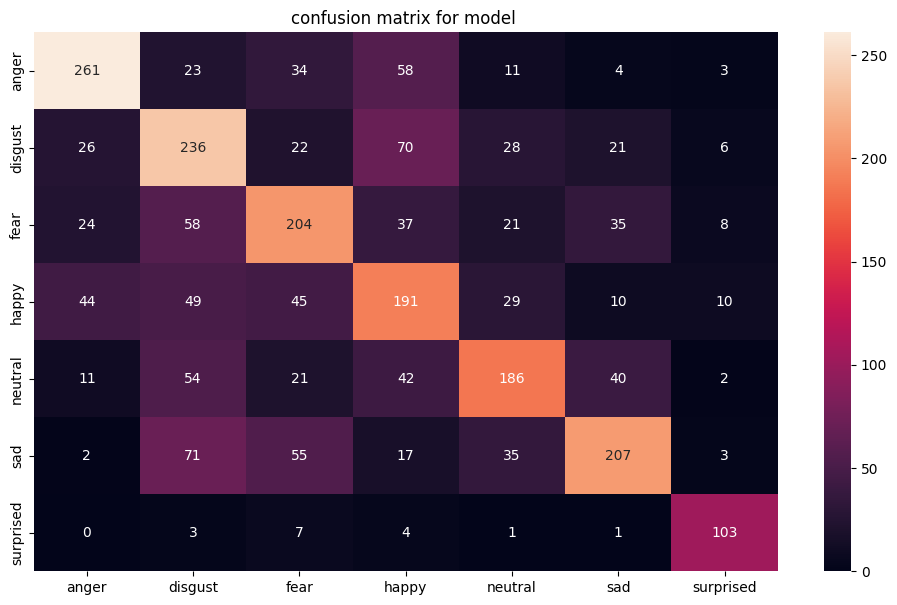

In [31]:
matrix=confusion_matrix(y_true, pred)
template=pd.DataFrame(
    matrix,index=[i for i in emotion_names],
    columns=[i for i in emotion_names]
)
plt.figure(figsize=(12,7))
ax=sns.heatmap(template,annot=True,fmt='d')
ax.set_title(f'confusion matrix for model ')
plt.show()